In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
!pip install category_encoders

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')


df= pd.read_csv('titanic.csv')



# Exploring the dataset

In [57]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Descriptive statistics of numerical columns

In [58]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# Descriptive statistics of all columns, including categorical ones

In [59]:
print(df.describe(include='all'))

        PassengerId    Survived      Pclass              Name   Sex  \
count    418.000000  418.000000  418.000000               418   418   
unique          NaN         NaN         NaN               418     2   
top             NaN         NaN         NaN  Kelly, Mr. James  male   
freq            NaN         NaN         NaN                 1   266   
mean    1100.500000    0.363636    2.265550               NaN   NaN   
std      120.810458    0.481622    0.841838               NaN   NaN   
min      892.000000    0.000000    1.000000               NaN   NaN   
25%      996.250000    0.000000    1.000000               NaN   NaN   
50%     1100.500000    0.000000    3.000000               NaN   NaN   
75%     1204.750000    1.000000    3.000000               NaN   NaN   
max     1309.000000    1.000000    3.000000               NaN   NaN   

               Age       SibSp       Parch    Ticket        Fare  \
count   332.000000  418.000000  418.000000       418  417.000000   
unique     

# Information about the DataFrame

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


# Missing values

In [61]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


In [62]:
df.isna().sum() / len(df) * 100

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,20.574163
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.239234


# Dataset Visualization

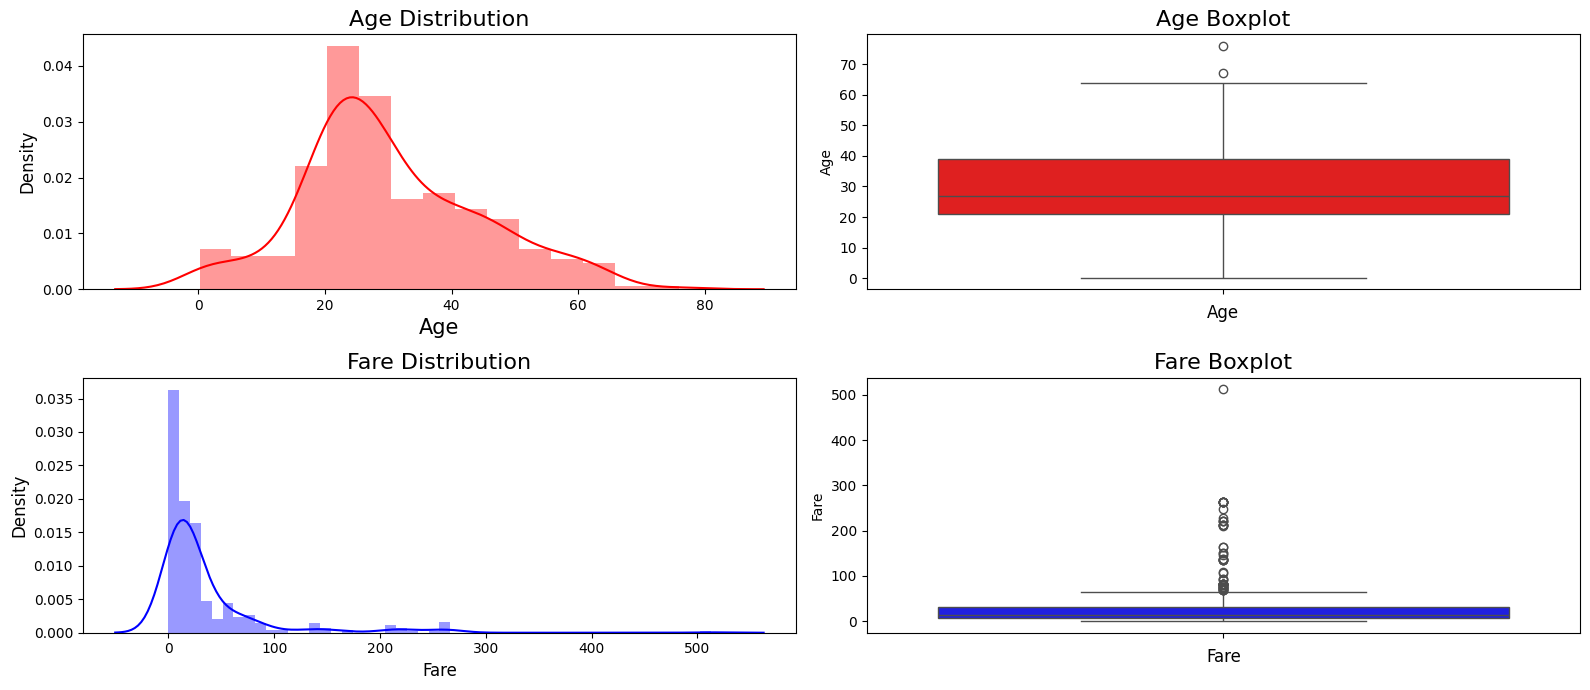

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 7))

# Plotting the Age distribution with a red color scheme
plt.subplot(2, 2, 1)
sns.distplot(df['Age'], color='red')
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Density', fontsize=12)

plt.subplot(2, 2, 2)
sns.boxplot(df['Age'], color='red')
plt.title('Age Boxplot', fontsize=16)
plt.xlabel('Age', fontsize=12)

# Plotting the Fare distribution with a green color scheme
plt.subplot(2, 2, 3)
sns.distplot(df['Fare'], color='blue')
plt.title('Fare Distribution', fontsize=16)
plt.xlabel('Fare', fontsize=12)
plt.ylabel('Density', fontsize=12)

plt.subplot(2, 2, 4)
sns.boxplot(df['Fare'], color='blue')
plt.title('Fare Boxplot', fontsize=16)
plt.xlabel('Fare', fontsize=12)

plt.tight_layout()
plt.show()


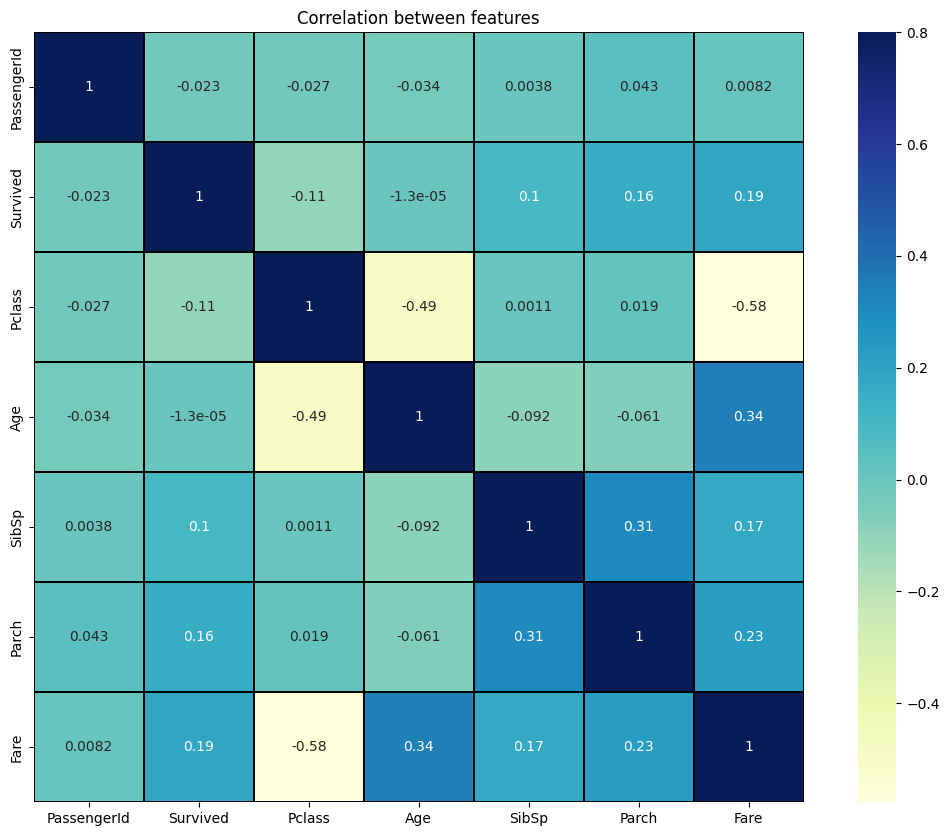

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have loaded the Titanic dataset into the 'titanic' DataFrame

# Drop non-numeric columns or select only numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr, vmax=.8, linewidths=0.01, square=True, annot=True, cmap='YlGnBu', linecolor="black")
plt.title('Correlation between features')
plt.show()

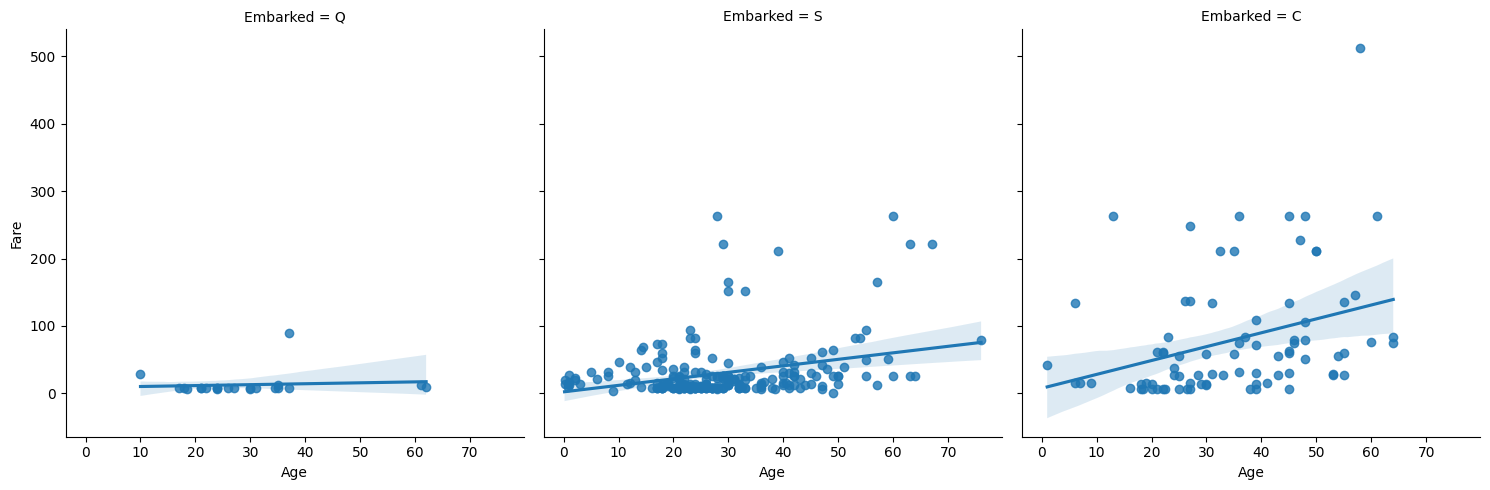

In [65]:
g= sns.lmplot(x="Age", y="Fare", col="Embarked", data=df)

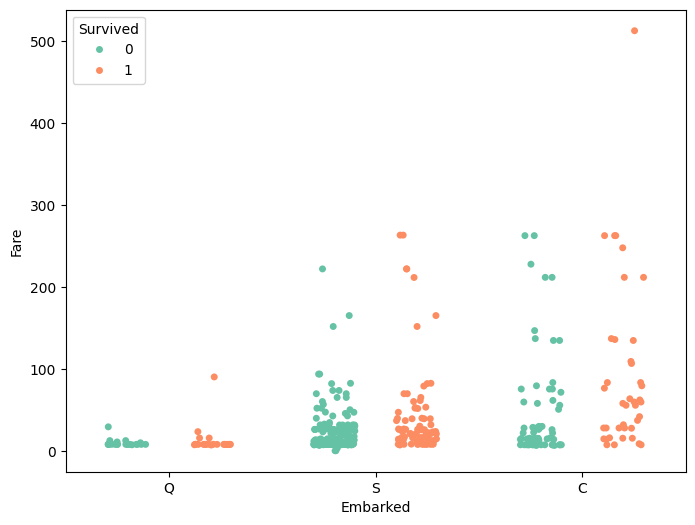

In [66]:
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="Embarked", y="Fare", hue="Survived",data=df, jitter=0.2, palette="Set2", dodge=True)
plt.show()

# Data Preprocessing


# Finding null values

In [67]:
df.isnull().sum().sort_values(ascending= False)

,0
Cabin,327
Age,86
Fare,1
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
SibSp,0
Parch,0


In [68]:
def missing(df):
    missing_number = df.isnull().sum()     # Calculating the number of missing values
    missing_percent = df.isnull().mean()   # Calculating the percentage of missing values

    # Creating a DataFrame with missing number and percentage, sorting by missing count in descending order
    missing_values = pd.DataFrame({
        'Missing_Number': missing_number,
        'Missing_Percent': missing_percent
    }).sort_values(by='Missing_Number', ascending=False)

    return missing_values


In [69]:
missing(df)

,Missing_Number,Missing_Percent
Cabin,327,0.782297
Age,86,0.205742
Fare,1,0.002392
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


# Handling the missing values

In [70]:
# Filling the missing value in Age column with the mean value
df['Age'] = df['Age'].fillna(df['Age'].mean())

# Filling the missing value in Fare columns with mean Value
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

# Filling the missing value in Embarked columns with backfill method
df['Embarked'] = df['Embarked'].fillna(method='backfill')

In [71]:
# Drop the columns
df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [72]:
# Converting the categorical variable into the numerical variable by using category_encoder
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['Survived','Pclass','Sex','Embarked'])
titanic_encoded = encoder.fit_transform(df)
titanic_encoded.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,1,1,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,1
1,893,2,1,"Wilkes, Mrs. James (Ellen Needs)",2,47.0,1,0,363272,7.0000,NaN,2
2,894,1,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,1
3,895,1,1,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,2
4,896,2,1,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",2,22.0,1,1,3101298,12.2875,NaN,2
5,897,1,1,"Svensson, Mr. Johan Cervin",1,14.0,0,0,7538,9.2250,NaN,2
6,898,2,1,"Connolly, Miss. Kate",2,30.0,0,0,330972,7.6292,NaN,1
7,899,1,2,"Caldwell, Mr. Albert Francis",1,26.0,1,1,248738,29.0000,NaN,2
8,900,2,1,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",2,18.0,0,0,2657,7.2292,NaN,3
9,901,1,1,"Davies, Mr. John Samuel",1,21.0,2,0,A/4 48871,24.1500,NaN,2


# Splitting


In [73]:
X = titanic_encoded.drop(['Survived'],axis=1)
y = df['Survived']

In [74]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state= 21)

In [75]:
X_train.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,1071,3,"Compton, Mrs. Alexander Taylor (Mary Eliza Ing...",2,64.00000,0,2,PC 17756,83.1583,E45,3
201,1093,1,"Danbom, Master. Gilbert Sigvard Emanuel",1,0.33000,0,2,347080,14.4000,NaN,2
336,1228,2,"de Brito, Mr. Jose Joaquim",1,32.00000,0,0,244360,13.0000,NaN,2
187,1079,1,"Davies, Mr. Joseph",1,17.00000,2,0,A/4 48873,8.0500,NaN,2
214,1106,1,"Andersson, Miss. Ida Augusta Margareta",2,38.00000,4,2,347091,7.7750,NaN,2
283,1175,1,"Touma, Miss. Maria Youssef",2,9.00000,1,1,2650,15.2458,NaN,3
19,911,1,"Assaf Khalil, Mrs. Mariana (Miriam"")""",2,45.00000,0,0,2696,7.2250,NaN,3
282,1174,1,"Fleming, Miss. Honora",2,30.27259,0,0,364859,7.7500,NaN,1
142,1034,3,"Ryerson, Mr. Arthur Larned",1,61.00000,1,3,PC 17608,262.3750,B57 B59 B63 B66,3
348,1240,2,"Giles, Mr. Ralph",1,24.00000,0,0,248726,13.5000,NaN,2


In [76]:
y.head(10)

,Survived
0,0
1,1
2,0
3,0
4,1
5,0
6,1
7,0
8,1
9,0


# Model implementation

In [77]:
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test, categorical_cols):

    encoder = ce.OrdinalEncoder(cols=categorical_cols)
    X_train_encoded = encoder.fit_transform(X_train)
    X_test_encoded = encoder.transform(X_test)

    model.fit(X_train_encoded, y_train)
    y_pred = model.predict(X_test_encoded)

    print("Training set score: {:.2f}".format(model.score(X_train_encoded, y_train)))
    print("Test set score: {:.2f}".format(model.score(X_test_encoded, y_test)))
    print("Accuracy Score: {:0.2f}".format(accuracy_score(y_test, y_pred)))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

categorical_cols = X.select_dtypes(include=['object']).columns

models = {
    "Logistic Regression": LogisticRegression(),
    "Neural Network": MLPClassifier(max_iter=300),
    "Support Vector Machine (SVM)": SVC(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    train_and_evaluate_model(model, X_train, X_test, y_train, y_test, categorical_cols)
    print("\n" + "-"*60 + "\n")


Evaluating Logistic Regression...
Training set score: 1.00
Test set score: 1.00
Accuracy Score: 1.00
Confusion Matrix:
 [[76  0]
 [ 0 50]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        50

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126


------------------------------------------------------------

Evaluating Neural Network...
Training set score: 0.76
Test set score: 0.72
Accuracy Score: 0.72
Confusion Matrix:
 [[68  8]
 [27 23]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.89      0.80        76
           1       0.74      0.46      0.57        50

    accuracy                           0.72       126
   macro avg       0.73      0.68      0.68       126
weighted avg     